In [1]:
# This are the Libraries which were imported and used 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# The Variable named "url" in that web site which is used is placed
url = "https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en"
page = requests.get(url)
page

<Response [200]>

In [3]:
# The library used to Parse Html
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="index,follow,noimageindex" name="robots"/>
<meta content="YouTubers.me" property="og:site_name"/>
<title>Top 1000 Youtube channels - India</title>
<meta content="Top 1000 Youtube channels - India" name="description"/>
<link href="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en" rel="canonical"/>
<meta content="https://yt3.ggpht.com/eu051krrRNQMMi5h6ynfnvhFJzxzSKulJQ42g5v72MQ9Bvv8KdpNIa6yM-0iGpnDgSF0itAD=s240-c-k-c0x00ffffff-no-rj" property="og:image"/>
<meta content="Top 1000 Youtube channels - India" property="og:title"/>
<meta content="https://pl.youtubers.me/india/all/top-1000-youtube-channels-in-india/en" property="og:url"/>
<meta content="Top 1000 Youtube channels - India" property="og:description"/>

In [4]:
# The tags of the parsed HTML are used here to scrape the perticular data
main_tag = soup.find("div",class_="main col col-sm-12")
sub_tag = main_tag.find("table",class_="top-charts")
under_sub = sub_tag.find_all("a")
sub_under_sub = sub_tag.find_all("td")

### ChannelNames

In [5]:
# From the under_sub Variable we iterated forloop and also used slicing to extract specific rows
ChannelNames = []
channels = []
for i in under_sub:
    channels.append(i.text)
A = channels[::2]
for i in A:
    ChannelNames.append(i.replace("\n","")  )  

### Category

In [6]:
# we just sliced the Variable channels here to get the Content Type 
Category = channels[1::2]

### Subscribers

In [7]:
#From the sub_under_sub Variable we iterated forloop and also used slicing to extract specific rows
Subscribers = []
for i in sub_under_sub[2::7]:
    Subscribers.append(i.text)

### ViewCount

In [8]:
#From the sub_under_sub Variable we iterated forloop and also used slicing to extract specific rows
ViewCount = []
for i in sub_under_sub[3::7]:
    ViewCount.append(i.text)

### VideoCount

In [9]:
#From the sub_under_sub Variable we iterated forloop and also used slicing to extract specific rows
VideoCount = []
for i in sub_under_sub[4::7]:
    VideoCount.append(i.text)    

### StartedYear

In [10]:
#From the sub_under_sub Variable we iterated forloop and also used slicing to extract specific rows
StartedYear = []
for i in sub_under_sub[6::7]:
    StartedYear.append(i.text)

In [11]:
#From the sub_under_sub Variable we iterated forloop and also used slicing to extract specific rows
data = []
for i in ViewCount:
    A = i.replace(",","")    
    data.append(int(A))

### Ad Revenue

In [12]:
# we estimated Ad_Revenue based on viewcount of perticular channel by multiplying every 5k views with 1$
Ad_Revenue = []
for earnings in data:
    result = earnings / 5000 * 82
    Ad_Revenue.append(result)

### Rank

In [13]:
# From the sub_under_sub Variable we iterated forloop and also used slicing to extract specific rows
Rank=[]
for i in sub_under_sub[::7]:
    Rank.append(i.text)
    

In [14]:
# we used dictionary to place whole columns in one place by assaining it to "df" variable
df={
    "Channel Name":ChannelNames,
    "Subscribers":Subscribers,
    "Category":Category,
    "Video Count":VideoCount,
    "View Count":ViewCount,
    "Revenue":Ad_Revenue,
    "Started Year":StartedYear,
    "Rank":Rank
}

In [15]:
projectYT=pd.DataFrame(df)

In [16]:
# This is the DataFrame
projectYT

Channel Name  Subscribers       Category  \
0                                SET India      157,000,000          Shows   
1                                Colors TV       63,800,000          Shows   
2                        Zee Music Company       95,900,000          Music   
3    ChuChu TV Nursery Rhymes & Kids Songs       65,500,000      Education   
4                               Wave Music       57,700,000          Music   
..                                         ...          ...            ...   
995                       Simply Time Pass        1,590,000  Entertainment   
996                            Sumit Bhyan        2,820,000  Entertainment   
997                              D2K Beats        1,010,000          Music   
998                       Hiren Amin Vlogs        1,370,000                  
999                          Selfie Gamers        5,650,000         Gaming   

    Video Count       View Count       Revenue Started Year  Rank  
0       114,578  146,969,264,358  2.410296e+09         2006     1  
1       111,363   60,768,227,878  9.965989e+08         2008     2  
2         8,403   57,298,263,052  9.396915e+08         2014     3  
3           614   45,437,089,283  7.451683e+08         2013     4  
4        19,424   40,431,755,532  6.630808e+08         2014     5  
..          ...              ...           ...          ...   ...  
995       1,314      904,613,112  1.483566e+07         2022   996  
996         129      903,976,940  1.482522e+07         2020   997  
997         207      903,857,534  1.482326e+07         2020   998  
998         617      903,648,006  1.481983e+07         2020   999  
999         910      902,554,669  1.480190e+07         2020  1000  

[1000 rows x 8 columns]

In [17]:
projectYT.to_csv("projecty.csv")

### Data Cleaning

In [18]:
# To see what are the datatypes of particular column
projectYT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Channel Name  1000 non-null   object 
 1   Subscribers   1000 non-null   object 
 2   Category      1000 non-null   object 
 3   Video Count   1000 non-null   object 
 4   View Count    1000 non-null   object 
 5   Revenue       1000 non-null   float64
 6   Started Year  1000 non-null   object 
 7   Rank          1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [19]:
re.sub(r"[,]","",projectYT["Subscribers"][0])

'157000000'

In [20]:
# To clean the data by removing special characters by using regex and for loop
projectYT["Subscribers"] = [re.sub(r"[,]","",i) for i in projectYT["Subscribers"]]
projectYT["Video Count"] = [re.sub(r"[,]","",i) for i in projectYT["Video Count"]]
projectYT["View Count"]  = [re.sub(r"[,]","",i) for i in projectYT["View Count"]]

In [21]:
# output after cleaning the data
projectYT

Channel Name Subscribers       Category  \
0                                SET India       157000000          Shows   
1                                Colors TV        63800000          Shows   
2                        Zee Music Company        95900000          Music   
3    ChuChu TV Nursery Rhymes & Kids Songs        65500000      Education   
4                               Wave Music        57700000          Music   
..                                         ...         ...            ...   
995                       Simply Time Pass         1590000  Entertainment   
996                            Sumit Bhyan         2820000  Entertainment   
997                              D2K Beats         1010000          Music   
998                       Hiren Amin Vlogs         1370000                  
999                          Selfie Gamers         5650000         Gaming   

    Video Count    View Count       Revenue Started Year  Rank  
0        114578  146969264358  2.410296e+09         2006     1  
1        111363   60768227878  9.965989e+08         2008     2  
2          8403   57298263052  9.396915e+08         2014     3  
3           614   45437089283  7.451683e+08         2013     4  
4         19424   40431755532  6.630808e+08         2014     5  
..          ...           ...           ...          ...   ...  
995        1314     904613112  1.483566e+07         2022   996  
996         129     903976940  1.482522e+07         2020   997  
997         207     903857534  1.482326e+07         2020   998  
998         617     903648006  1.481983e+07         2020   999  
999         910     902554669  1.480190e+07         2020  1000  

[1000 rows x 8 columns]

In [22]:
projectYT["Subscribers"] = projectYT["Subscribers"].astype("int")

In [23]:
projectYT["Video Count"] = projectYT["Video Count"].astype("int")
projectYT["Started Year"] = projectYT["Started Year"].astype("int")
projectYT["Rank"] = projectYT["Rank"].astype("int")

In [24]:
projectYT["View Count"] = [int(i) for i in projectYT["View Count"]]

In [25]:
#this gives the weather thier or nulls values or not
projectYT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Channel Name  1000 non-null   object 
 1   Subscribers   1000 non-null   int32  
 2   Category      1000 non-null   object 
 3   Video Count   1000 non-null   int32  
 4   View Count    1000 non-null   int64  
 5   Revenue       1000 non-null   float64
 6   Started Year  1000 non-null   int32  
 7   Rank          1000 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 47.0+ KB


### Data Analysis
- Univariant
- Bivariant 
- Multivariant

### Univariant Analysis

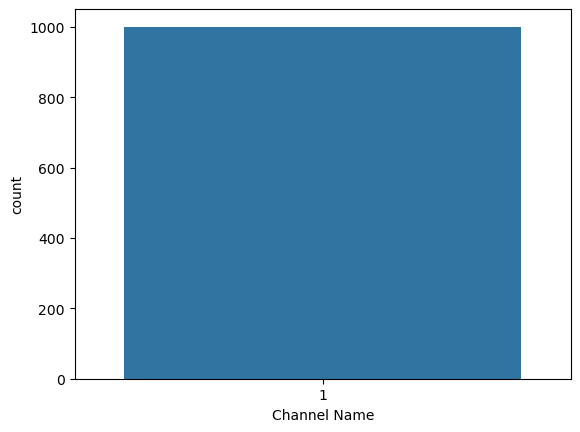

In [26]:
sns.countplot(projectYT["Channel Name"].value_counts())
plt.show()

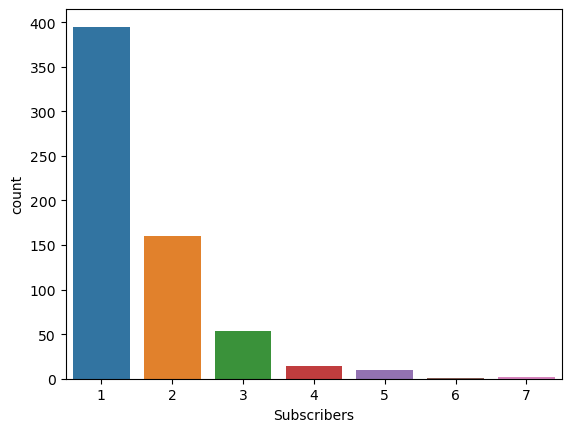

In [27]:
sns.countplot(projectYT["Subscribers"].value_counts())
plt.show()

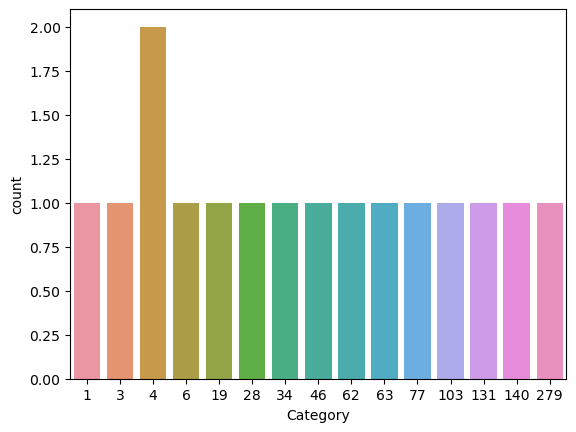

In [28]:
sns.countplot(projectYT["Category"].value_counts())
plt.show()

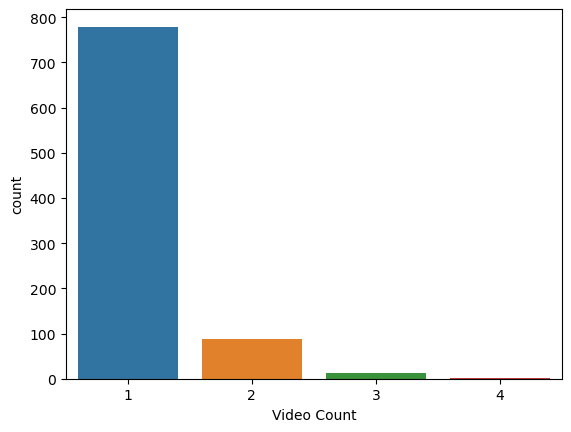

In [29]:
sns.countplot(projectYT["Video Count"].value_counts())
plt.show()

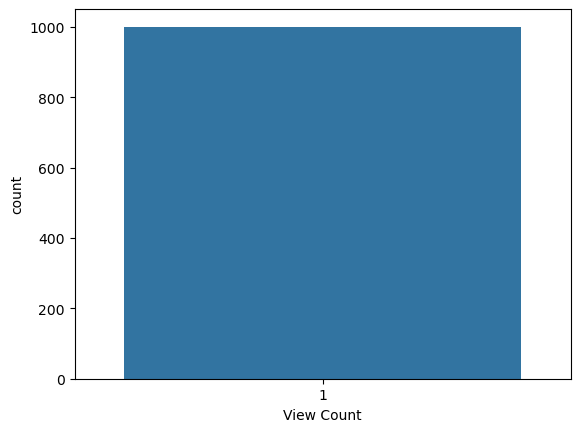

In [30]:
sns.countplot(projectYT["View Count"].value_counts())
plt.show()

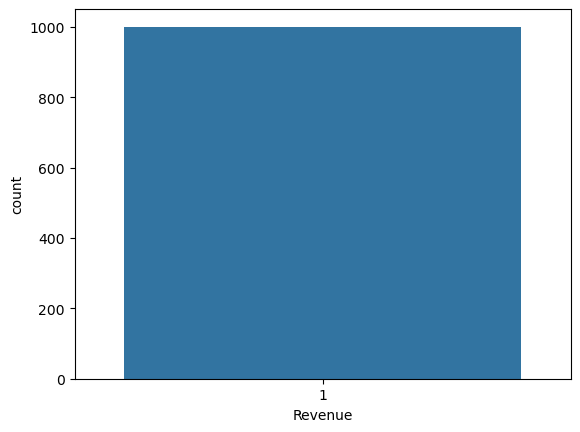

In [31]:
sns.countplot(projectYT["Revenue"].value_counts())
plt.show()

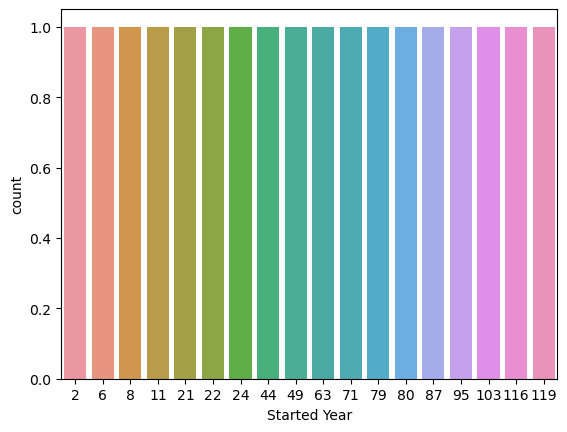

In [32]:
#below shows the count plot of started year
sns.countplot(projectYT["Started Year"].value_counts())
plt.show()

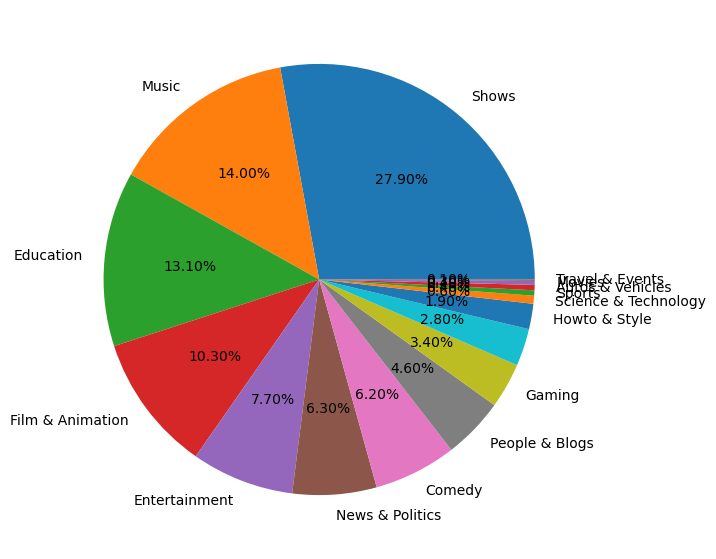

In [33]:
# below is the Pie chart shows the percentage of our project
plt.figure(figsize=(13,7))
plt.pie(projectYT["Category"].value_counts(),labels=projectYT["Category"].unique(),autopct="%0.02f%%")
plt.show()

### Bivariate Analysis

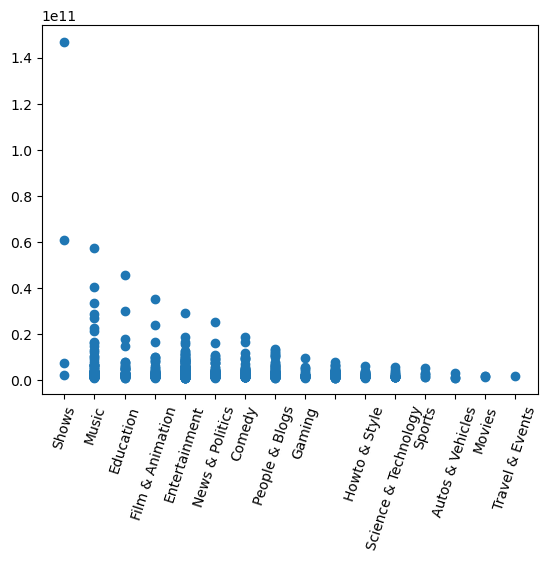

In [34]:
#this says the Bivariate analysis and extracting two columns comes under Bivariate analysis
plt.xticks(rotation = 72)
plt.scatter(projectYT["Category"],projectYT["View Count"])

<AxesSubplot:xlabel='Category', ylabel='View Count'>

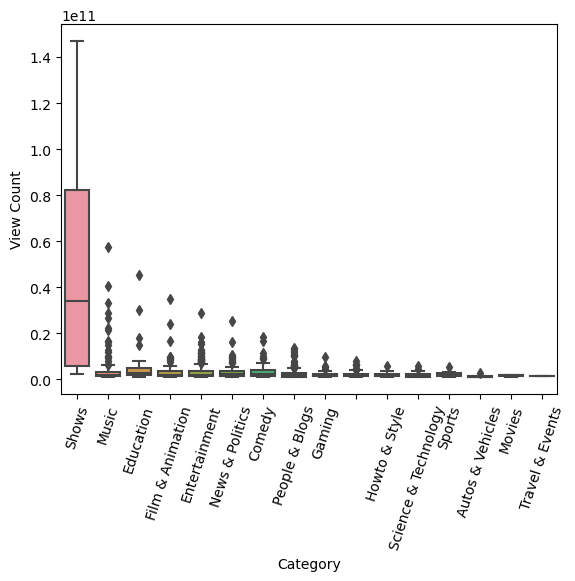

In [39]:
# this below gives the about boxplot
plt.xticks(rotation = 72)
sns.boxplot(projectYT["Category"],projectYT["View Count"])

### Multivariate

<AxesSubplot:xlabel='Channel Name', ylabel='Subscribers'>

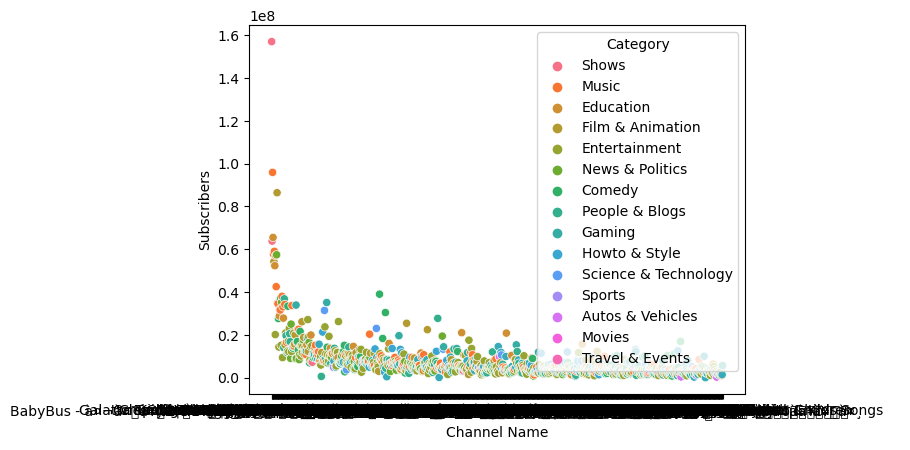

In [41]:
#multivariate means collectings many columns of the data and below shows the multivariate
sns.scatterplot(projectYT["Channel Name"],projectYT["Subscribers"],hue = projectYT["Category"])

In [37]:
#says the count of the category
projectYT.groupby("Category").count()

Channel Name  Subscribers  Video Count  View Count  \
Category                                                                   
                               103          103          103         103   
Autos & Vehicles                 4            4            4           4   
Comedy                          62           62           62          62   
Education                       46           46           46          46   
Entertainment                  279          279          279         279   
Film & Animation                63           63           63          63   
Gaming                          28           28           28          28   
Howto & Style                   34           34           34          34   
Movies                           3            3            3           3   
Music                          131          131          131         131   
News & Politics                 77           77           77          77   
People & Blogs                 140          140          140         140   
Science & Technology            19           19           19          19   
Shows                            4            4            4           4   
Sports                           6            6            6           6   
Travel & Events                  1            1            1           1   

                      Revenue  Started Year  Rank  
Category                                           
                          103           103   103  
Autos & Vehicles            4             4     4  
Comedy                     62            62    62  
Education                  46            46    46  
Entertainment             279           279   279  
Film & Animation           63            63    63  
Gaming                     28            28    28  
Howto & Style              34            34    34  
Movies                      3             3     3  
Music                     131           131   131  
News & Politics            77            77    77  
People & Blogs            140           140   140  
Science & Technology       19            19    19  
Shows                       4             4     4  
Sports                      6             6     6  
Travel & Events             1             1     1

### Heat Map

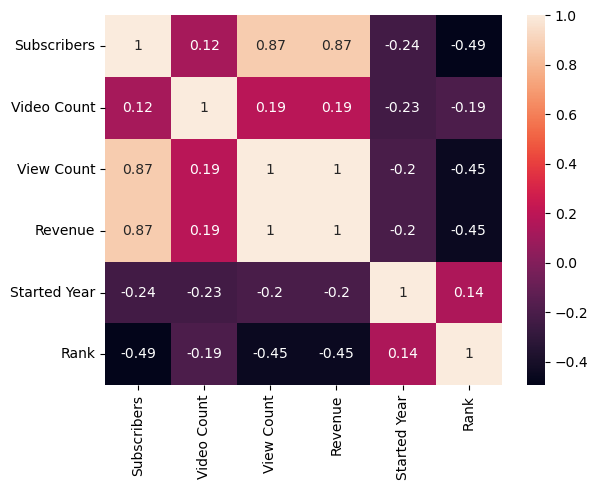

In [38]:
# this represents the heat map
sns.heatmap(projectYT.corr(),annot = True)
plt.show()